In [8]:
import fasttext
import fasttext.util

from gensim import models

To install `pip install fasttext`,

first run `apt-get install build-essential -y`!

Before running this ipynb notebook,

first run `python download_fasttext.py`.

In [9]:
ft = fasttext.load_model('../cc.ko.100.bin')

In [6]:
fasttext.util.reduce_model(ft, 100)
ft.get_dimension()

100

In [7]:
ft.save_model('../cc.ko.100.bin')

In [10]:
results = ft.get_nearest_neighbors("파이썬", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.750: 자바스크립트
0.724: 프로그래밍
0.716: 텐서플로우
0.714: 레일스
0.701: 제이쿼리
0.689: Python
0.679: 정규표현식
0.674: 파이선
0.672: 리눅스
0.671: 파이썬을


In [11]:
results = ft.get_nearest_neighbors("게임", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.762: 슈팅
0.725: 만화
0.723: 콘솔
0.721: VR
0.711: 위쳐
0.711: 농구
0.709: 라테일
0.708: 장르
0.708: 건슈팅
0.706: 턴제


In [12]:
results = ft.get_nearest_neighbors("이순신", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.757: 이순신장군
0.713: 김시민
0.702: 곽재우
0.698: 행주대첩
0.695: 충무공
0.686: 이순신과
0.685: 이순신장군의
0.683: 이여송
0.677: 李純信
0.676: 율곡이이


In [13]:
results = ft.get_nearest_neighbors("과학", k=10)
for d, w in results:
    print("%.3f: %s" % (d, w))

0.795: 의학
0.782: 수학
0.778: 공학
0.769: 학문
0.750: 철학
0.726: 물리
0.726: 科學
0.719: 학술
0.717: 교육
0.711: 인문


In [13]:
def get_nearest_word_vectors(query_word: str, k: int = 10):
    results = ft.get_nearest_neighbors(query_word, k)
    word = [query_word]
    similarity = [1]
    word_vectors = [ft.get_word_vector(query_word)]
    for d, w in results:
        word.append(w)
        similarity.append(d)
        word_vectors.append(ft.get_word_vector(w))
    return {'word': word,
            'similarity': similarity,
            'word_vectors': word_vectors}


In [54]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [75]:
results = get_nearest_word_vectors("애플", k=20)

In [76]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(results["word_vectors"])

In [77]:
svd = TruncatedSVD(n_components=3)
svd_result = svd.fit_transform(results["word_vectors"])

In [79]:
print(pca.explained_variance_ratio_)
print(svd.explained_variance_ratio_)

[0.21812107 0.13263512 0.09805022]
[0.20108709 0.13291039 0.09813897]


```
apt-get install fonts-nanum*
apt-get install fontconfig
rm -rf ~/.cache/matplotlib/*
```

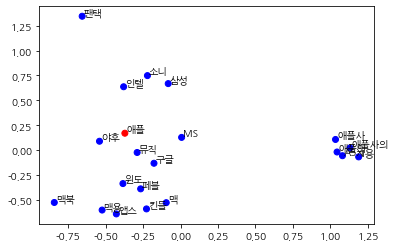

In [80]:
ax1, ax2 = 0, 1

plt.scatter(x=pca_result[:, ax1], y=pca_result[:, ax2], 
    c=['red' if i == 0 else 'blue' for i in range(len(pca_result))])
for x, y, s in zip(pca_result[:, ax1]+0.01, pca_result[:, ax2]+0.01, results["word"]):
    plt.text(x, y, s)

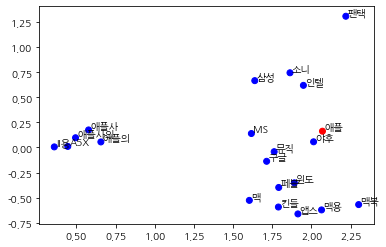

In [81]:
ax1, ax2 = 0, 1

plt.scatter(x=svd_result[:, ax1], y=svd_result[:, ax2], 
    c=['red' if i == 0 else 'blue' for i in range(len(svd_result))])
for x, y, s in zip(svd_result[:, ax1]+0.01, svd_result[:, ax2]+0.01, results["word"]):
    plt.text(x, y, s)

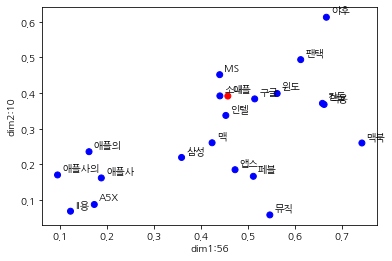

In [82]:
ax1, ax2 = np.argsort(svd.components_[0])[-1], np.argsort(svd.components_[0])[-2]

xs = [results['word_vectors'][i][ax1] for i in range(len(results['word_vectors']))]
ys = [results['word_vectors'][i][ax2] for i in range(len(results['word_vectors']))]

plt.scatter(x=xs, y=ys, c=['red' if i == 0 else 'blue' for i in range(len(svd_result))])
plt.xlabel("dim1:" + str(ax1))
plt.ylabel("dim2:" + str(ax2))
for x, y, s in zip(xs, ys, results["word"]):
    plt.text(x+0.01, y+0.01, s)